# Welcome to Covid19 Data Analysis Notebook
------------------------------------------

### Let's Import the modules 

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
print('Modules are imported.')

Modules are imported.


## Task 2 

### Task 2.1: importing covid19 dataset
importing "Covid19_Confirmed_dataset.csv" from "./Dataset" folder. 


In [3]:
corona_dataset_csv=pd.read_csv('covid19_Confirmed_dataset.csv')

In [7]:
corona_dataset_csv.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


#### Let's check the shape of the dataframe

In [15]:
corona_dataset_csv.shape

(266, 104)

In [22]:
corona_dataset_csv.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

In [42]:
corona_dataset_csv['Country/Region']

0                Afghanistan
1                    Albania
2                    Algeria
3                    Andorra
4                     Angola
               ...          
261           Western Sahara
262    Sao Tome and Principe
263                    Yemen
264                  Comoros
265               Tajikistan
Name: Country/Region, Length: 266, dtype: object

In [46]:
corona_dataset_csv.isna().sum()

Province/State    184
Country/Region      0
Lat                 0
Long                0
1/22/20             0
                 ... 
4/26/20             0
4/27/20             0
4/28/20             0
4/29/20             0
4/30/20             0
Length: 104, dtype: int64

### Task 2.2: Delete the useless columns

In [51]:
corona_dataset_csv.drop(['Lat','Long'],axis=1,inplace=True)

In [53]:
df=corona_dataset_csv

### Task 2.3: Aggregating the rows by the country

In [56]:
corona_country=corona_dataset_csv.groupby('Country/Region').agg(np.sum)

In [57]:
corona_country

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,466,474,480,484,342,342,342,343,344,344
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6


### Task 2.4: Visualizing data related to a country for example China
visualization always helps for better understanding of our data.

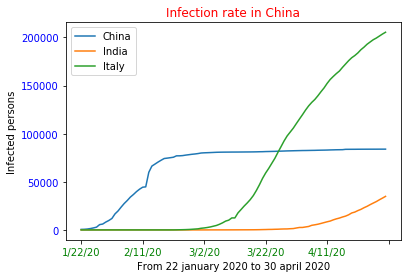

In [83]:
corona_country.loc['China'].plot()
corona_country.loc['India'].plot()
corona_country.loc['Italy'].plot()
plt.title('Infection rate in China',color='r')
plt.xticks(color='g')
plt.yticks(color='b')
plt.xlabel('From 22 january 2020 to 30 april 2020')
plt.ylabel('Infected persons')
plt.legend()
plt.show()

In [90]:
corona_country['Total_cases']=corona_country.sum(axis=1)

In [94]:
corona_country_sorted=corona_country.sort_values(by='Total_cases',ascending=False)

## Plotting the top 5 countries infection rates

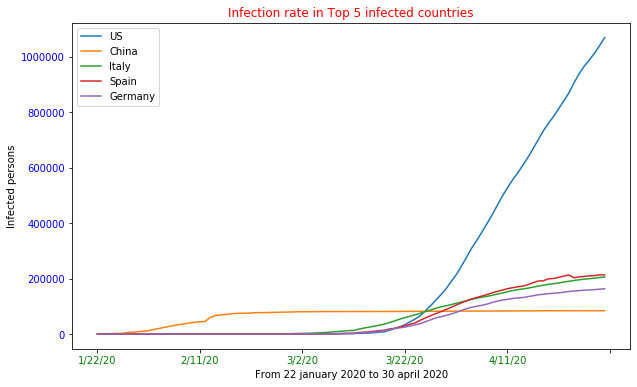

In [124]:
plt.figure(figsize=(10,6))
corona_country_sorted.iloc[0,:-1].plot()
corona_country_sorted.iloc[1,:-1].plot()
corona_country_sorted.iloc[2,:-1].plot()
corona_country_sorted.iloc[3,:-1].plot()
corona_country_sorted.iloc[4,:-1].plot()
plt.title('Infection rate in Top 5 infected countries',color='r')
plt.xticks(color='g')
plt.yticks(color='b')
plt.xlabel('From 22 january 2020 to 30 april 2020')
plt.ylabel('Infected persons')
plt.legend()
plt.show()

### Task3: Calculating a good measure 
we need to find a good measure reperestend as a number, describing the spread of the virus in a country. 

### Viewing the effect in first 5 days in top5 countries

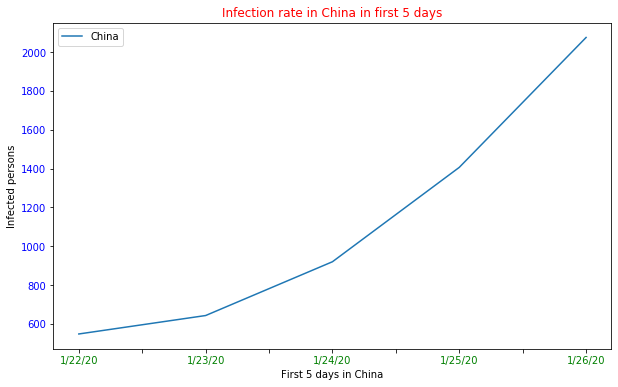

In [125]:
plt.figure(figsize=(10,6))
corona_country_sorted.loc['China'][:5].plot()
plt.title('Infection rate in China in first 5 days',color='r')
plt.xticks(color='g')
plt.yticks(color='b')
plt.xlabel('First 5 days in China')
plt.ylabel('Infected persons')
plt.legend()
plt.show()

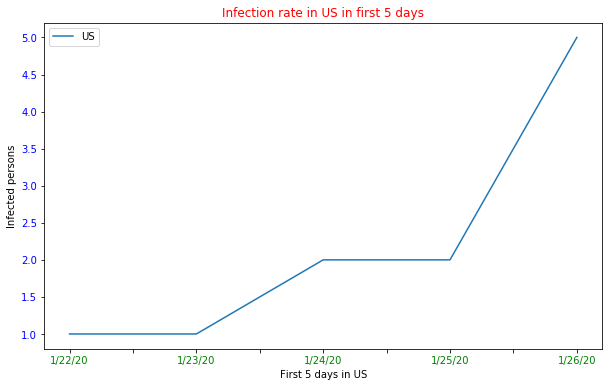

In [131]:
plt.figure(figsize=(10,6))
corona_country_sorted.loc['US'][:5].plot()
plt.title('Infection rate in US in first 5 days',color='r')
plt.xticks(color='g')
plt.yticks(color='b')
plt.xlabel('First 5 days in US')
plt.ylabel('Infected persons')
plt.legend()
plt.show()

### task 3.1: caculating the first derivative of the curve for China

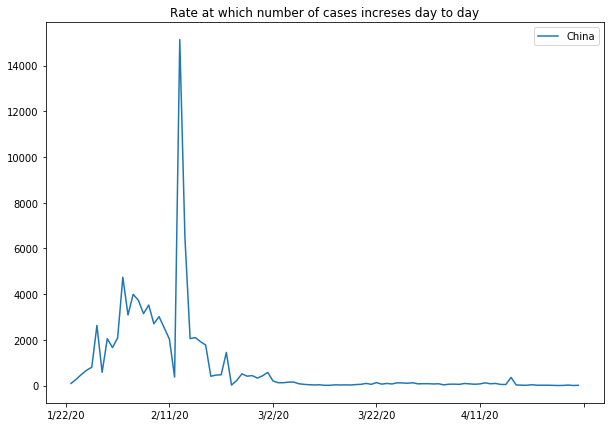

In [138]:
plt.figure(figsize=(10,7))
corona_country_sorted.loc['China'][:-1].diff().plot()
plt.title('Rate at which number of cases increses day to day')
plt.legend()
plt.show()

### task 3.2: find maxmimum infection rate for China

In [141]:
corona_country_sorted.loc['China'][:-1].diff().max()

15136.0

In [142]:
# This means in one day 15136 no of new cases occured in china at max  

In [143]:
corona_country_sorted.loc['China'][:-1].diff().min()

3.0

In [146]:
corona_country_sorted.loc['China'][:-1].diff().mean()

842.5050505050505

On an average 842 new cases occurs daily

### Task 3.3: find maximum infection rate for all of the countries. 

In [159]:
corona_country_sorted.loc['Italy'][:-1].diff().max()

6557.0

In [160]:
corona_country_sorted.loc['Spain'][:-1].diff().max()

9630.0

In [162]:
corona_country_sorted.loc['US'][:-1].diff().max()

36188.0

In [165]:
countries=corona_country_sorted.index

In [168]:
max_infection_rates=[]
for country in countries:
    max_infection_rates.append(corona_country_sorted.loc[country][:-1].diff().max())

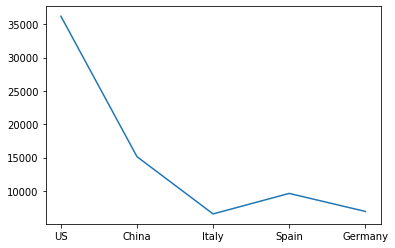

In [176]:
plt.plot(countries[:5],max_infection_rates[:5])

In [177]:
corona_country_sorted['Max_infection_rate']=max_infection_rates

### Task 3.4: create a new dataframe with only needed column 

In [178]:
corona_data=pd.DataFrame(corona_country_sorted['Max_infection_rate'])

In [179]:
corona_data

,Max_infection_rate
Country/Region,
US,36188.0
China,15136.0
Italy,6557.0
Spain,9630.0
Germany,6933.0
...,...
Western Sahara,4.0
Sao Tome and Principe,6.0
Yemen,5.0


## Plotting the max infection rates of top 5 infected countries

<BarContainer object of 5 artists>

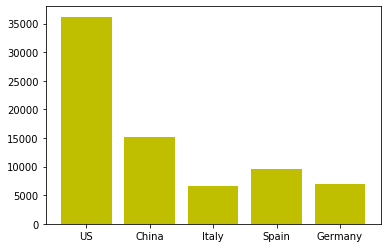

In [187]:
plt.bar(x=corona_country_sorted.index[:5],height=corona_country_sorted['Max_infection_rate'][:5],color='y')

### Task4: 
- Importing the WorldHappinessReport.csv dataset
- selecting needed columns for our analysis 
- join the datasets 
- calculate the correlations as the result of our analysis

### Task 4.1 : importing the dataset

In [188]:
hapiness_report=pd.read_csv('worldwide_happiness_report.csv')

In [189]:
hapiness_report.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [192]:
hapiness_report.shape

(156, 9)

### Task 4.2: let's drop the useless columns 

In [202]:
useless_cols=['Overall rank','Score', 'Generosity','Perceptions of corruption']

In [204]:
hapiness_report.drop(columns=useless_cols,axis=1,inplace=True)
hapiness_report.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,1.340,1.587,0.986,0.596
1,Denmark,1.383,1.573,0.996,0.592
2,Norway,1.488,1.582,1.028,0.603
3,Iceland,1.380,1.624,1.026,0.591
4,Netherlands,1.396,1.522,0.999,0.557


### Task 4.3: changing the indices of the dataframe

In [233]:
hapiness_report.set_index("Country or region",inplace=True)

### Task4.4: now let's join two dataset we have prepared  

#### Corona Dataset :

In [239]:
corona_data.head()

,Max_infection_rate
Country/Region,
US,36188.0
China,15136.0
Italy,6557.0
Spain,9630.0
Germany,6933.0


In [240]:
corona_data.shape

(187, 1)

#### wolrd happiness report Dataset :

In [241]:
hapiness_report

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557
...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555
Tanzania,0.476,0.885,0.499,0.417
Afghanistan,0.350,0.517,0.361,0.000


In [243]:
final_data=corona_data.join(hapiness_report,how='inner')

In [244]:
final_data.head()

,Max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
China,15136.0,1.029,1.125,0.893,0.521
Italy,6557.0,1.294,1.488,1.039,0.231
Spain,9630.0,1.286,1.484,1.062,0.362
Germany,6933.0,1.373,1.454,0.987,0.495
France,26849.0,1.324,1.472,1.045,0.436


### Task 4.5: correlation matrix 

In [245]:
final_data.corr()

,Max_infection_rate,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Max_infection_rate,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


### Task 5: Visualization of the results
our Analysis is not finished unless we visualize the results in terms figures and graphs so that everyone can understand what you get out of our analysis

### Task 5.1: Plotting GDP vs maximum Infection rate

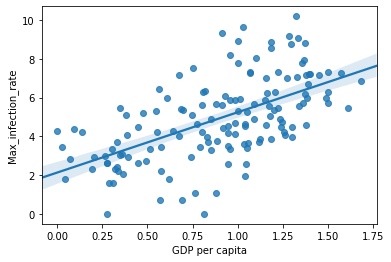

In [261]:
x=final_data['GDP per capita']
y=final_data['Max_infection_rate']
sns.regplot(x,np.log(y))
# using log because the scale of max infectio rate is too high wrt gdp per capita
plt.show()

### Task 5.2: Plotting Social support vs maximum Infection rate

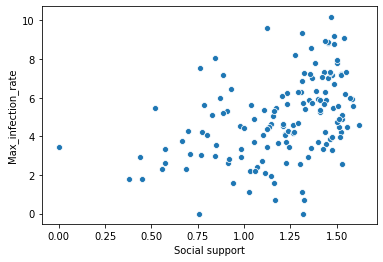

In [263]:
x=final_data['Social support']
y=final_data['Max_infection_rate']
sns.scatterplot(x,np.log(y))
# using log because the scale of max infectio rate is too high wrt gdp per capita
plt.show()         

### Task 5.3: Plotting Healthy life expectancy vs maximum Infection rate

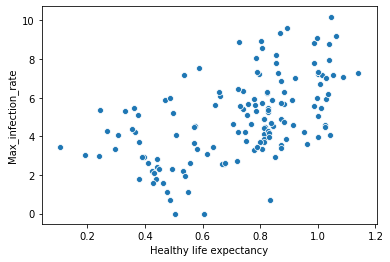

In [267]:
x=final_data['Healthy life expectancy']
y=final_data['Max_infection_rate']
sns.scatterplot(x,np.log(y))
# using log because the scale of max infectio rate is too high wrt gdp per capita
plt.show()

### Task 5.4: Plotting Freedom to make life choices vs maximum Infection rate

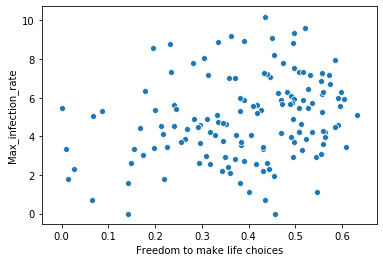

In [268]:
x=final_data['Freedom to make life choices']
y=final_data['Max_infection_rate']
sns.scatterplot(x,np.log(y))
# using log because the scale of max infectio rate is too high wrt gdp per capita
plt.show()